<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week6/WOA7015_Wk6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 6
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# Section 1: Principal Component Analysis
Facts: 
*   PCA is often used to measure data in term of its principal components rather than on a normal x-y axis
*   Principal components describes the direction of the data in which the variance is the highest / spread out.
*   PCA is a dimensional reduction or data compression method
*   Mathematically, the principal components are the eigen vector of the covariance matrix of orignal datasets. 
*   The principal components (eigen vector) correspond to the direction with the greatest variance in data. 
*   Each eigen vector has a corresponding eigenvalue. The eigenvalue is a scalar value and indicates how much variance there is in the data along that eigenvector. 











In this section, we will write a code to perform PCA. 

In [13]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

Step 1: Generate the following matrix. 


In [10]:
# Matrix of orignal data
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df

,f1,f2,f3,f4
0,1,2,3,4
1,5,5,6,7
2,1,4,2,3
3,5,3,2,1
4,8,1,2,2


In [9]:
# 1. Standardize data
df_std = (df-df.mean()) / df.std()
df_std

,f1,f2,f3,f4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


In [11]:
# 2. Calculate covariance matrix for the features in the datasets.
covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)


covMatrix
[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]
------------------------------------------------



In [14]:
# compute eigenvalue
w, v = LA.eig(covMatrix)
print('eigenvalue, ', w)
eigen_df = pd.DataFrame(v, columns=['e1', 'e2', 'e3', 'e4'], index=w)
print(eigen_df)


eigenvalue,  [2.01263459 0.8522308  0.31510964 0.02002497]
                e1        e2        e3        e4
2.012635  0.161960 -0.917059 -0.307071  0.196162
0.852231 -0.524048  0.206922 -0.817319  0.120610
0.315110 -0.585896 -0.320539  0.188250 -0.720099
0.020025 -0.596547 -0.115935  0.449733  0.654547


transform_matrix with 1 principal components
[[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
------------------------------------------------

         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
------------------------------------------------

transform_matrix with 2 principal components
[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
------------------------------------------------

         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
----

Text(0, 0.5, 'error')

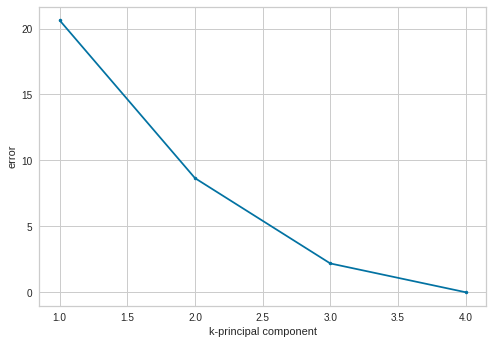

In [16]:
# tranform dataset to principal component space
err = []
pc=[]
for k in range(1, 5):
  B = v[:, :k]
  B2 = np.matmul(np.transpose(B), B)
  B3 = np.matmul(B2, np.transpose(B))
  transform_mat = np.matmul(df_std.to_numpy(), np.transpose(B3)) 
  print(f"transform_matrix with {k} principal components")
  print(transform_mat)
  print('------------------------------------------------\n')
  

  # transform back to original space
  ori_std_mat = np.matmul(transform_mat, B3)
  ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  print('------------------------------------------------\n')

  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)


plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')


In [ ]:
## Try with built in PCA function 

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt

A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df_std = (df-df.mean()) / df.std()

covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)
print('------------------------------------------------\n')

err=[]
pc=[]
for k in range(1, 5):
  print('k:', k)
  pca = PCA(n_components=k)
  principalComponent = pca.fit_transform(df_std)
  principalDf = pca.fit_transform(df_std)
  print(np.sum(pca.explained_variance_ratio_) )
  temp = pca.inverse_transform(principalDf) ## uses PCA function 
  ori_std_mat_df = pd.DataFrame(temp, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)

plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')

## As k increases, this means that more data is retained and thus, the error reduces

## Section 2 : Try with dummy data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

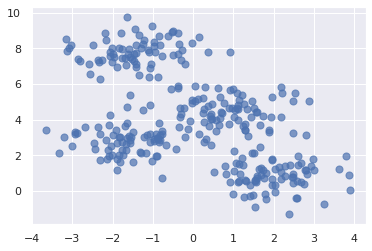

In [ ]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

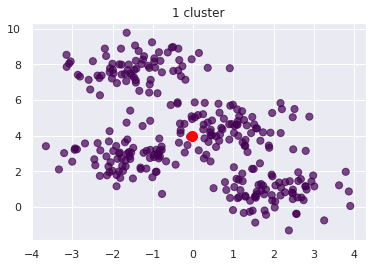

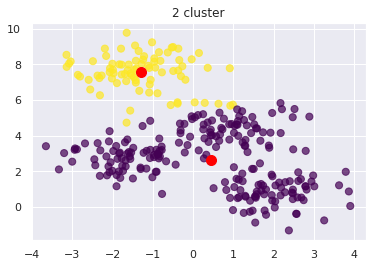

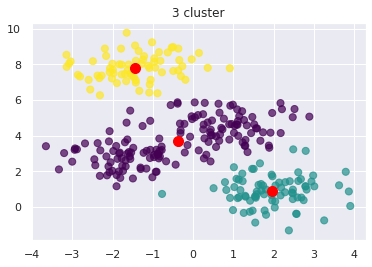

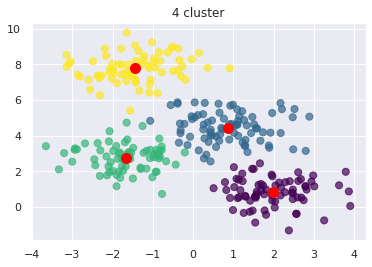

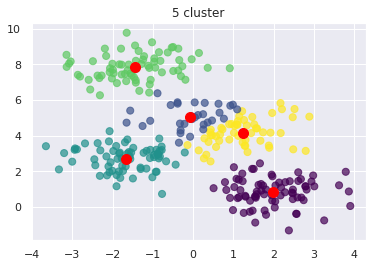

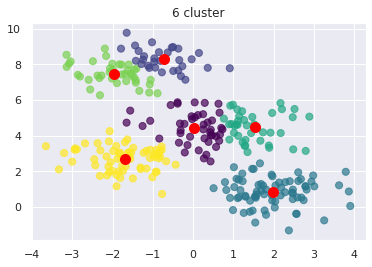

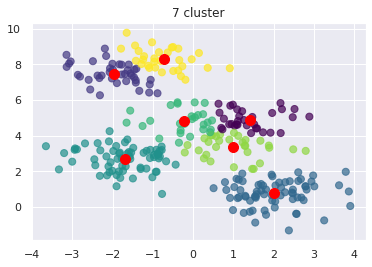

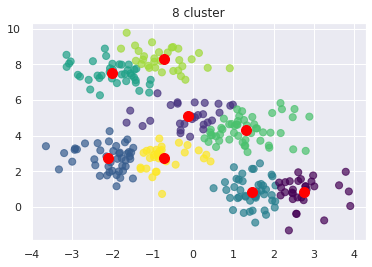

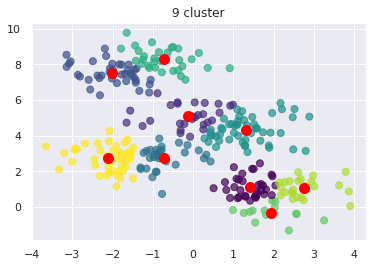

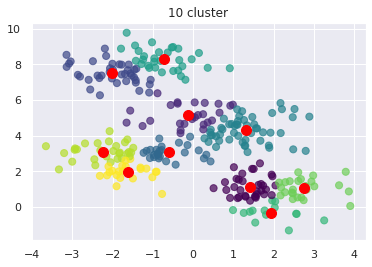

In [ ]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)
  
  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
  
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
  

Text(0, 0.5, 'Inertia')

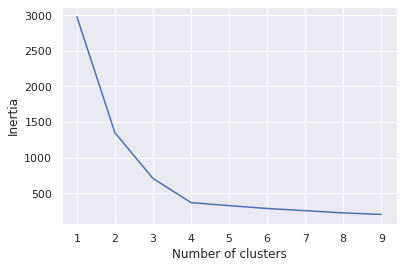

In [ ]:
inertias = []
 
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Case study of K-means Clusters on Credit Card Dataset

source: https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/data <br>

credit to MOHAMMAD NAMVARPOUR


# Exercise (10%)


# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# References:
1. https://www.wintellect.com/unsupervised-learning-with-k-means-clustering-part-ii/ 

2. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset#Conclusion

3. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/notebook#Preprocessing
